In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
housing_raw = pd.read_csv(
    'assignments/data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
ca_housing = (housing_raw.loc[
        (housing_raw['region_name'].str.contains('CA'))
    ].assign(region_name = housing_raw['region_name'].str[0:-11])
     .set_index('period_begin').sort_index()
)
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [8]:
# del ca_inventory_pivot
ca_price_pivot = ca_housing.pivot_table(
    index = 'period_begin',
    columns = 'region_name',
    values = 'median_active_list_price'
)

ca_price_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,651075.0,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,651991.6,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,652735.4,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,654443.7,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,656943.7,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6


In [9]:
region_list = ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']
ca_housing_markets = ca_price_pivot.loc[:, region_list]
ca_housing_markets

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5
...,...,...,...,...
2022-03-28,1289875.0,906783.0,901649.6,387928.9
2022-04-04,1289916.6,906783.1,902899.8,388951.8
2022-04-11,1290250.0,906782.4,902899.8,389863.7


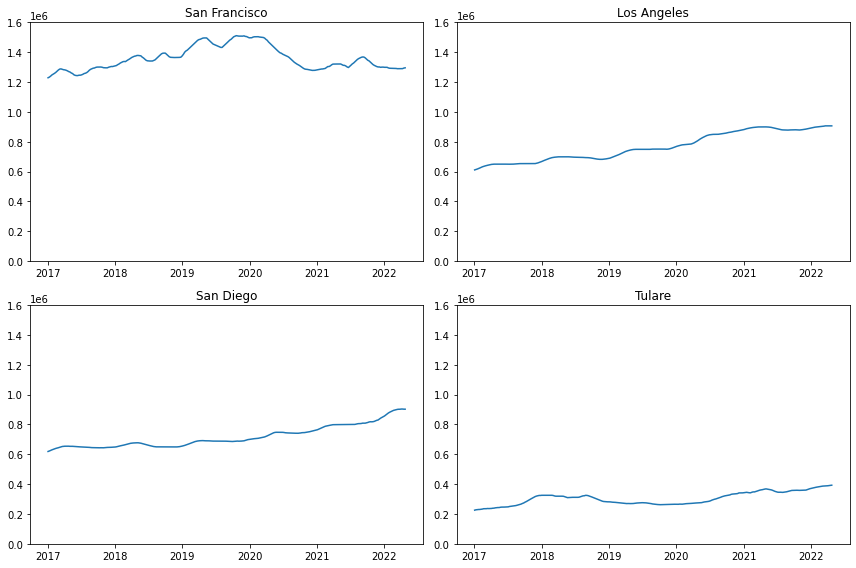

In [10]:
fig = plt.figure(figsize=(12, 8))

ax_list = []
nrows, ncols = (2, 2)

for i in range(1, len(region_list) + 1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.plot(ca_housing_markets.index, ca_housing_markets[region_list[i-1]])
    ax.set_ylim(0, 1600000)
    ax.set_title(region_list[i-1])
    ax_list.append(ax)
    
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

plt.tight_layout()
plt.show()

In [11]:
diamonds = (pd.read_csv('./assignments/data/Diamonds Prices2022.csv')).drop(['Unnamed: 0'], axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [12]:
from matplotlib.gridspec import GridSpec

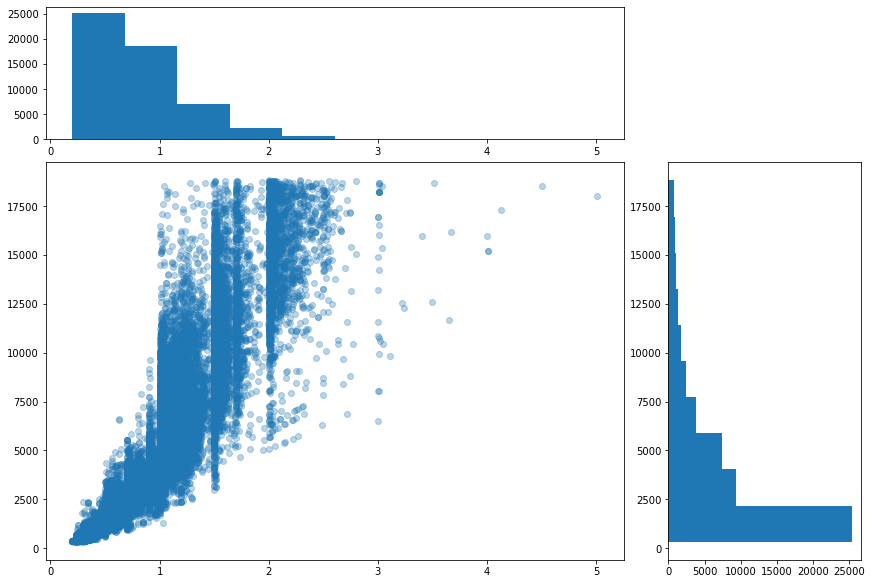

In [13]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)

grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:, :6])
ax2 = fig.add_subplot(grid[:2, :6])
ax3 = fig.add_subplot(grid[2:, 6:])

ax1.scatter(diamonds['carat'], diamonds['price'], alpha=.3)
ax2.hist(diamonds['carat'])
ax3.hist(diamonds['price'], orientation='horizontal')

plt.show()

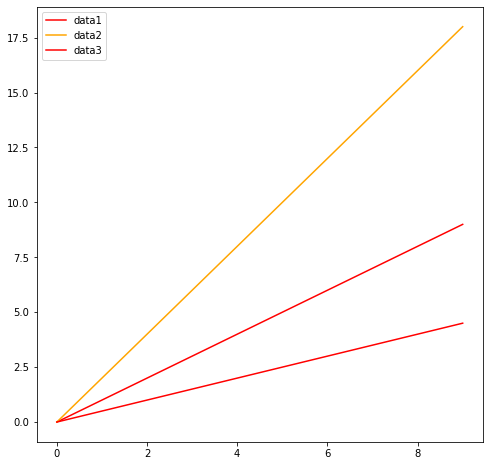

In [25]:
data1 = [x for x in range(10)]
data2 = [2*x for x in range(10)]
data3 = [x/2.0 for x in range(10)]

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['red', 'orange'])

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(data1, label='data1')
ax.plot(data2, label='data2')
ax.plot(data3, label='data3')

ax.legend()
plt.show()

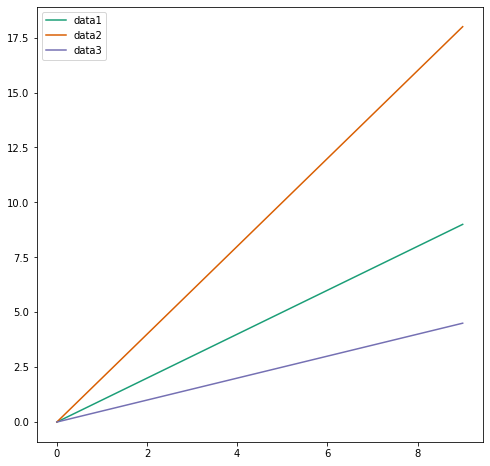

In [26]:
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Dark2.colors)

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(data1, label='data1')
ax.plot(data2, label='data2')
ax.plot(data3, label='data3')

ax.legend()
plt.show()

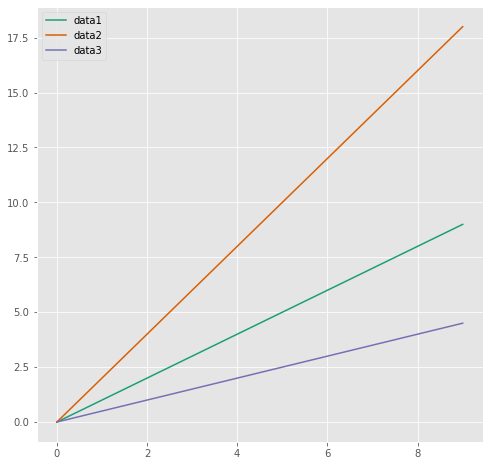

In [28]:
plt.style.use('ggplot')
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Dark2.colors)

fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(data1, label='data1')
ax.plot(data2, label='data2')
ax.plot(data3, label='data3')

ax.legend()
plt.show()

In [30]:
import seaborn as sns

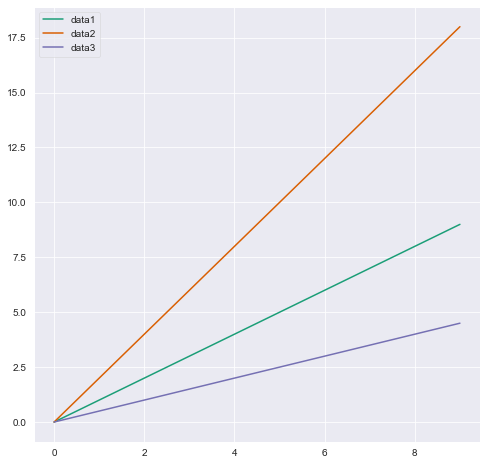

In [31]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(data1, label='data1')
ax.plot(data2, label='data2')
ax.plot(data3, label='data3')

ax.legend()
plt.show()